# Import important libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data mnist from keras datasets in form of tuple of training and test data
#### Once Loaded it's better to normalize the data

In [2]:
# Load Mnist using keras
mnist_data = tf.keras.datasets.mnist

In [3]:
# Data is tuple
(X_train, y_train),(X_test, y_test) = mnist_data.load_data()

In [4]:
# Normalize the data
X_train = X_train/255.0
X_test = X_test/255.0

# Creating the ANN model

#### We use 1 dummy layer i.e. input layer (here we use Flatten since our input is 28x28)
#### We use 2 Dense layers with 125 Neurons in 1st layer(hyperparameter) - Activation is ReLu
#### We use 10 Neurons in output layer since we have 10 classes - Activation is Softmax
#### We use Adam optimizer and sparse_categorical_crossentropy as loss function since our label is in form of integers and not probability distributions. The metric we use is accuracy
#### We run our model for 12 epochs.

In [5]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape = (28,28)),
            tf.keras.layers.Dense(125, activation = 'relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation = 'softmax')
])

In [6]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 12)

Epoch 1/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4834 - accuracy: 0.8584 - val_loss: 0.1404 - val_accuracy: 0.9589
Epoch 2/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1460 - accuracy: 0.9562 - val_loss: 0.0995 - val_accuracy: 0.9689
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9667 - val_loss: 0.0796 - val_accuracy: 0.9741
Epoch 4/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0894 - accuracy: 0.9725 - val_loss: 0.0863 - val_accuracy: 0.9724
Epoch 5/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0726 - accuracy: 0.9770 - val_loss: 0.0715 - val_accuracy: 0.9768
Epoch 6/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0809 - val_accuracy: 0.9746
Epoch 7/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0677 - val_accuracy:

## The History
#### The model creates a history object which contains training loss, validation loss, training accuracy and validation accuracy
#### We use matplotlib to plot the losses and accuracy


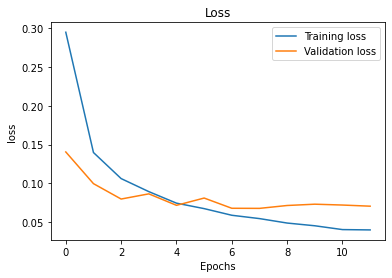

In [8]:
plt.plot(r.history['loss'], label = 'Training loss')
plt.plot(r.history['val_loss'], label = 'Validation loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend();

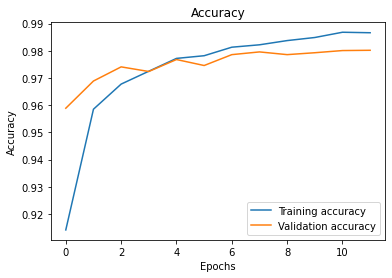

In [9]:
plt.plot(r.history['accuracy'], label = 'Training accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Why wrong predictions ?
#### We want to see why we had wrong predictions. We plot anyone of the wrong precitions and the results tell themselves why the model made an error while predicting.

In [10]:
# finding the wrong predictions
predict = model.predict(X_test).argmax(axis = 1)

Text(0.5, 1.0, '0 has been predicted as 6')

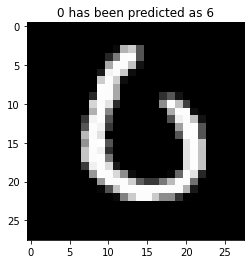

In [15]:
error = np.where(predict != y_test)
any_one = int(np.random.choice(error[0]))
plt.imshow(X_test[any_one], cmap = 'gray')
plt.title(f'{y_test[any_one]} has been predicted as {predict[any_one]}')